In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
%matplotlib inline

In [3]:
data = pd.read_pickle("Data/Output_5.pickle")

data.head()

,Country,Region,Code,Date,Sex,Age,AgeInt,Cases,Deaths,Tests
0,Afghanistan,All,AF01.07.2020,01.07.2020,b,0,5,43.4,0.0,NaN
1,Afghanistan,All,AF01.07.2020,01.07.2020,b,5,5,125.6,0.0,NaN
2,Afghanistan,All,AF01.07.2020,01.07.2020,b,10,5,371.6,1.5,NaN
3,Afghanistan,All,AF01.07.2020,01.07.2020,b,15,5,1153.4,3.5,NaN
4,Afghanistan,All,AF01.07.2020,01.07.2020,b,20,5,3151.6,6.3,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9419760 entries, 0 to 9419759
Data columns (total 10 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Country  object 
 1   Region   object 
 2   Code     object 
 3   Date     object 
 4   Sex      object 
 5   Age      int64  
 6   AgeInt   int64  
 7   Cases    float64
 8   Deaths   float64
 9   Tests    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 718.7+ MB


In [5]:
data.Date = pd.to_datetime(data.Date, format="%d.%m.%Y")

data.sort_values("Date", inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9419760 entries, 4334453 to 8971904
Data columns (total 10 columns):
 #   Column   Dtype         
---  ------   -----         
 0   Country  object        
 1   Region   object        
 2   Code     object        
 3   Date     datetime64[ns]
 4   Sex      object        
 5   Age      int64         
 6   AgeInt   int64         
 7   Cases    float64       
 8   Deaths   float64       
 9   Tests    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 790.5+ MB


In [6]:
data.columns= data.columns.str.strip().str.lower()

data.rename(
    columns={
        "country":"country_name",
        "cases":"detailed_cases",
        "deaths":"detailed_cases_deaths",
        "tests":"person_tested"
    }, inplace=True
)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9419760 entries, 4334453 to 8971904
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   country_name           object        
 1   region                 object        
 2   code                   object        
 3   date                   datetime64[ns]
 4   sex                    object        
 5   age                    int64         
 6   ageint                 int64         
 7   detailed_cases         float64       
 8   detailed_cases_deaths  float64       
 9   person_tested          float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 790.5+ MB


In [7]:
data = data[(data.region == "All") & (data.date >= pd.to_datetime("2021.01.01"))]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519834 entries, 4077796 to 8971904
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   country_name           519834 non-null  object        
 1   region                 519834 non-null  object        
 2   code                   519834 non-null  object        
 3   date                   519834 non-null  datetime64[ns]
 4   sex                    519834 non-null  object        
 5   age                    519834 non-null  int64         
 6   ageint                 519834 non-null  int64         
 7   detailed_cases         431487 non-null  float64       
 8   detailed_cases_deaths  372036 non-null  float64       
 9   person_tested          51030 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 43.6+ MB


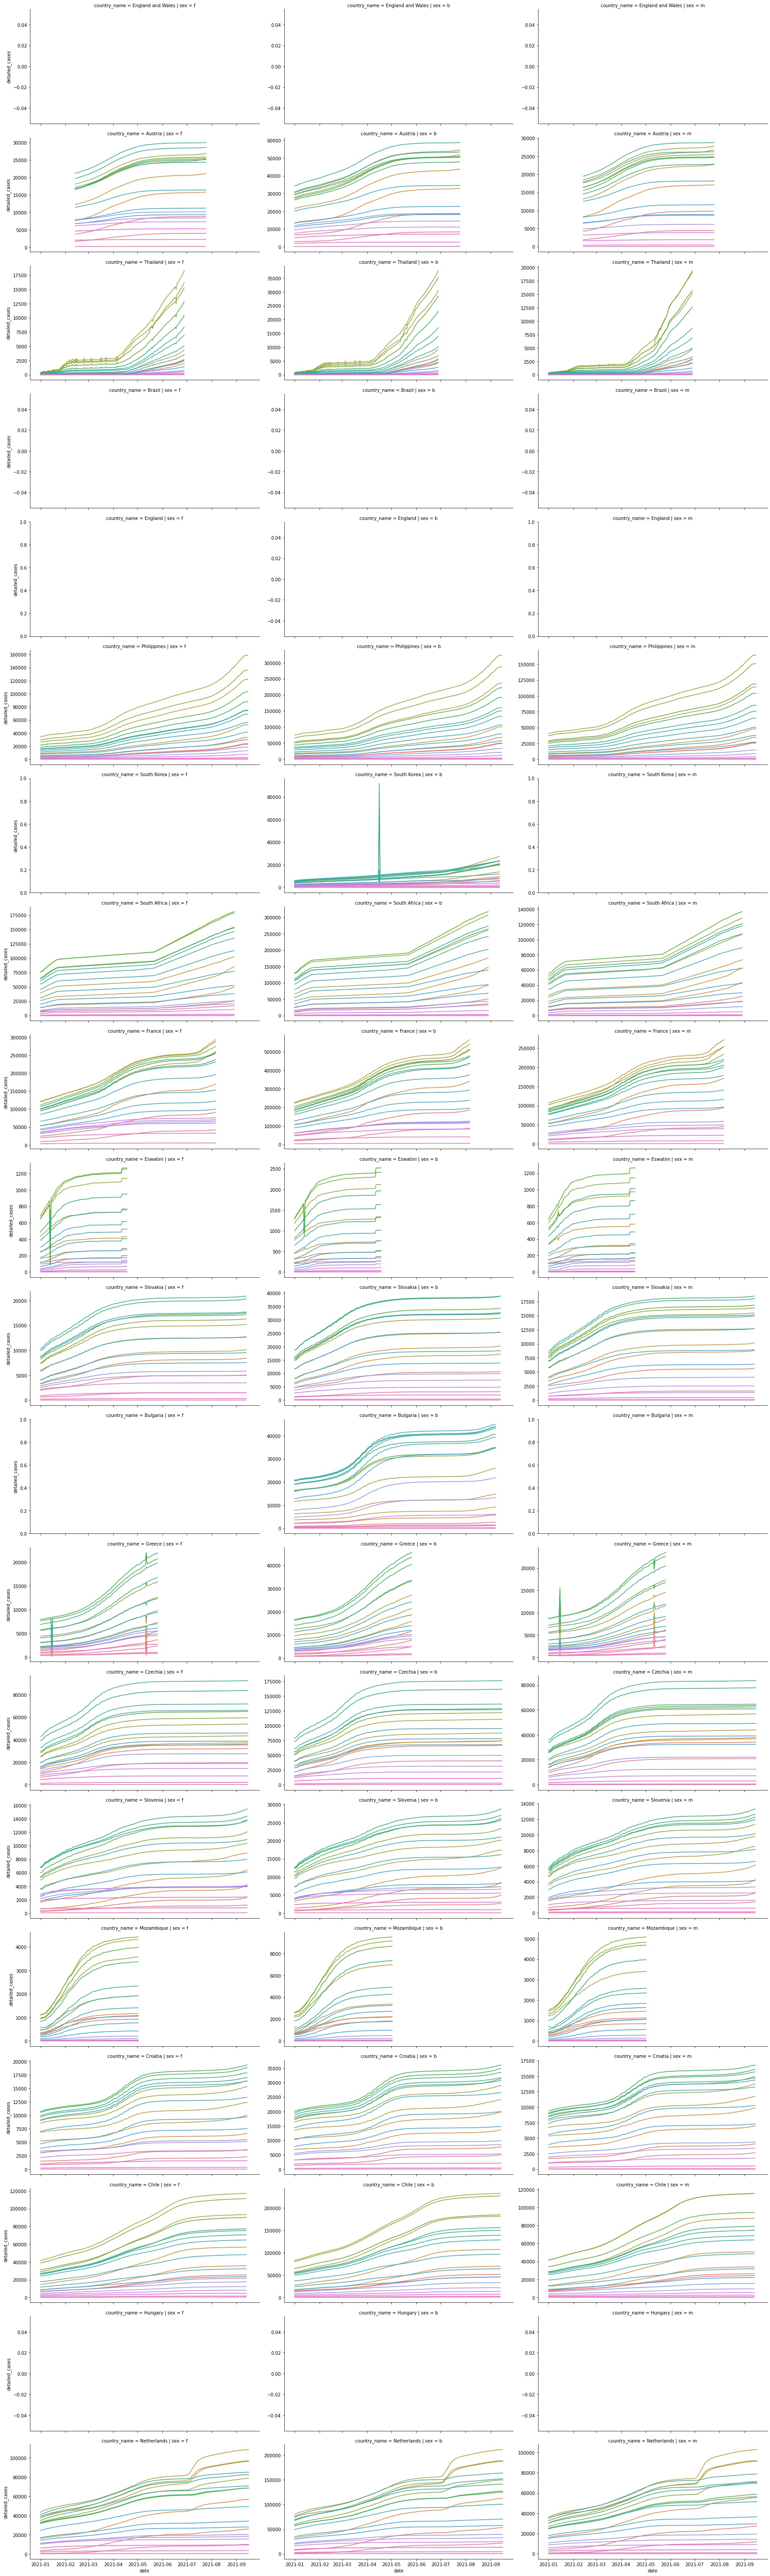

In [8]:
gridplots = sns.FacetGrid(
    data[data.country_name.isin(data.country_name.unique()[0:20])],
    col='sex',
    row='country_name',
    hue='age',
    height=4,
    aspect=2,
    sharex=True,
    sharey=False
)

gridplots.map(sns.lineplot,'date', 'detailed_cases')

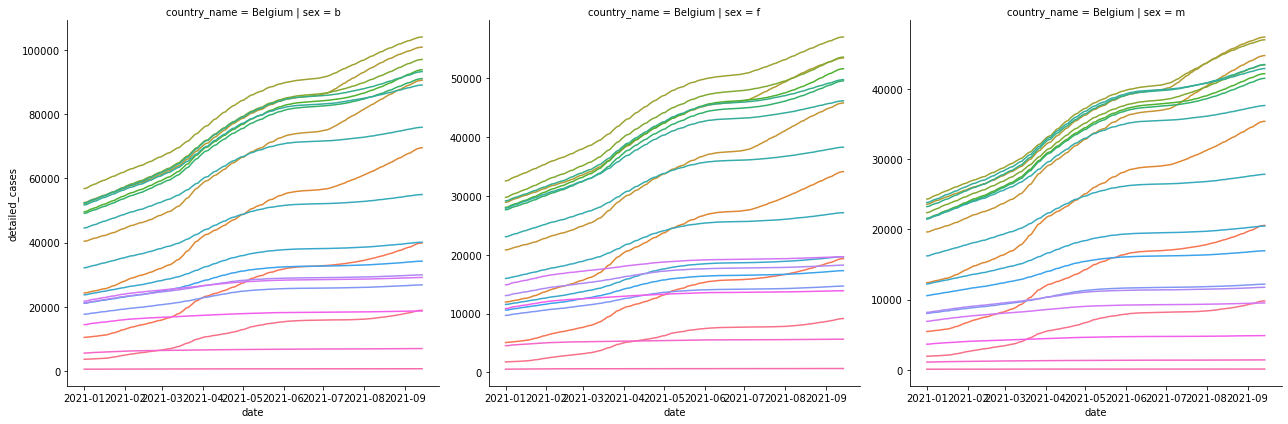

In [9]:
belgium_df = data[(data.country_name=="Belgium")]

gridplots = sns.FacetGrid(
    belgium_df,
    col='sex',
    row='country_name',
    hue='age',
    height=6,
    aspect=1,
    sharex=True,
    sharey=False
)

gridplots.map(sns.lineplot,'date', 'detailed_cases')

plt.show()

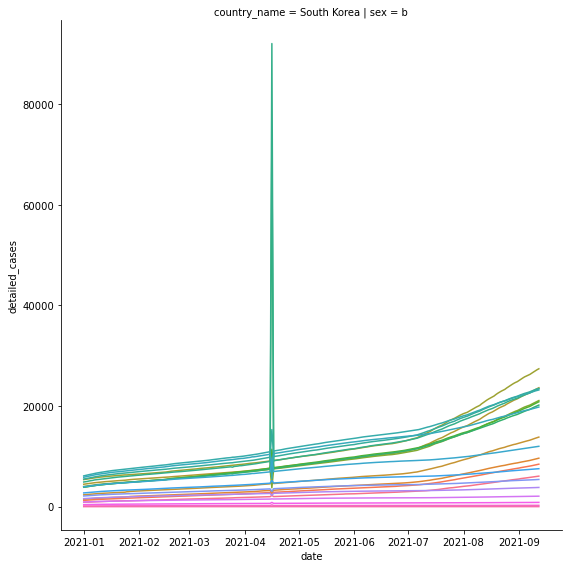

In [10]:
Korea_df = data[(data.country_name=="South Korea")]

gridplots = sns.FacetGrid(
    Korea_df,
    col='sex',
    row='country_name',
    hue='age',
    height=8,
    aspect=1,
    sharex=True,
    sharey=False
)

gridplots.map(sns.lineplot,'date', 'detailed_cases')

plt.show()

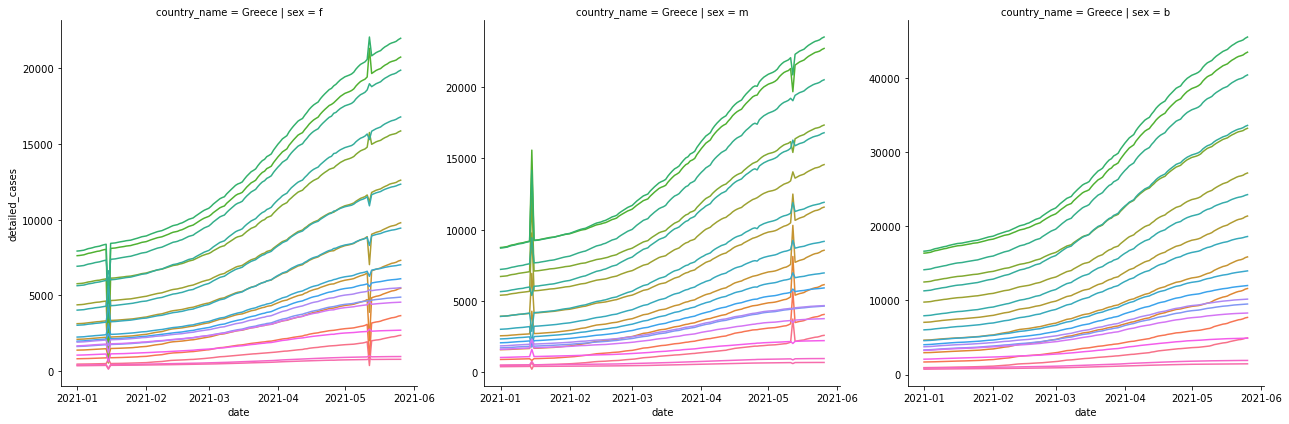

In [11]:
Greece_df = data[(data.country_name=="Greece")]

gridplots = sns.FacetGrid(
    Greece_df,
    col='sex',
    row='country_name',
    hue='age',
    height=6,
    aspect=1,
    sharex=True,
    sharey=False
)

gridplots.map(sns.lineplot,'date', 'detailed_cases')

plt.show()

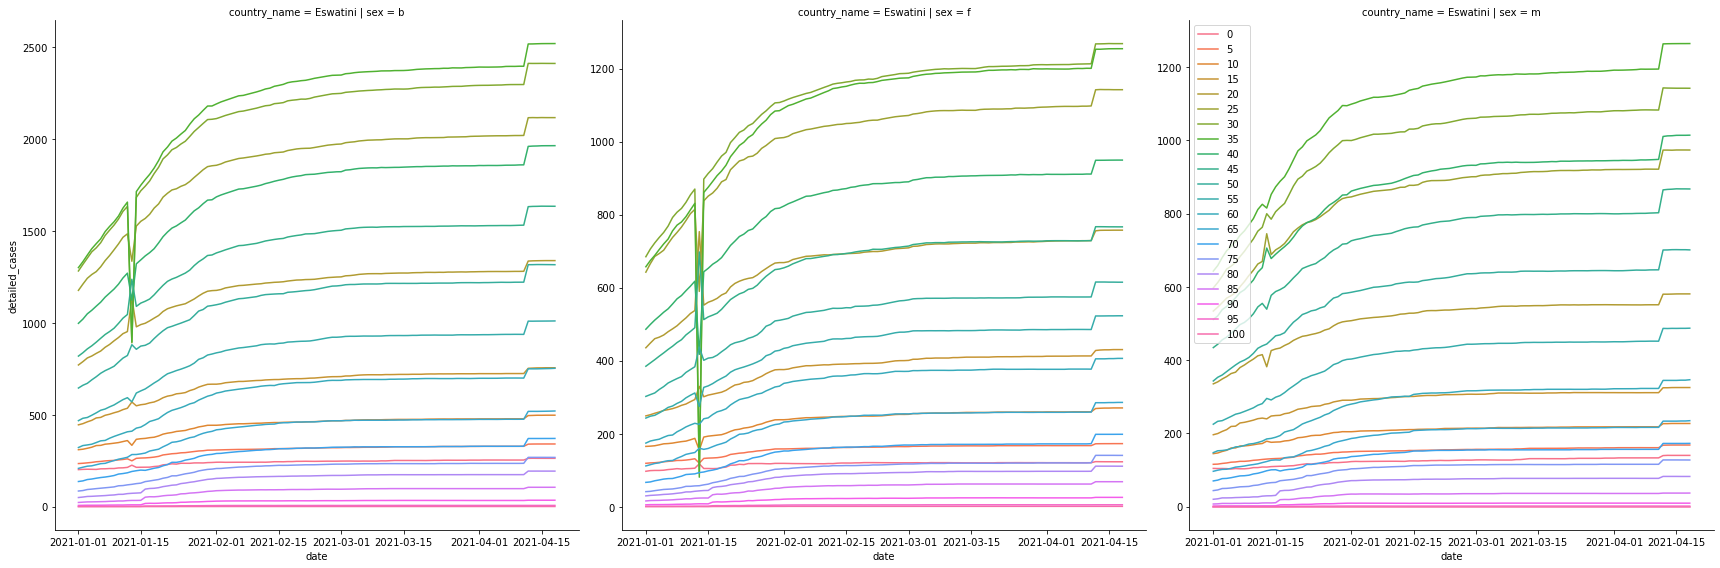

In [12]:
Eswatini_df = data[(data.country_name=="Eswatini")]

gridplots = sns.FacetGrid(
    Eswatini_df,
    col='sex',
    row='country_name',
    hue='age',
    height=8,
    aspect=1,
    sharex=True,
    sharey=False
)

gridplots.map(sns.lineplot,'date', 'detailed_cases')
plt.legend()
plt.show()

In [13]:
Eswatini_df[
    (Eswatini_df.date >= pd.to_datetime("2021-01-10")) &
    (Eswatini_df.date <= pd.to_datetime("2021-01-15")) &
    (Eswatini_df.sex == "m") &
    (Eswatini_df.age == 35)
].head(20)

,country_name,region,code,date,sex,age,ageint,detailed_cases,detailed_cases_deaths,person_tested
4388272,Eswatini,All,SZ10.01.2021,2021-01-10,m,35,5,786.2,NaN,NaN
4388335,Eswatini,All,SZ11.01.2021,2021-01-11,m,35,5,811.0,NaN,NaN
4388398,Eswatini,All,SZ12.01.2021,2021-01-12,m,35,5,825.3,NaN,NaN
4388461,Eswatini,All,SZ13.01.2021,2021-01-13,m,35,5,815.0,NaN,NaN
4388524,Eswatini,All,SZ14.01.2021,2021-01-14,m,35,5,852.3,NaN,NaN
4388587,Eswatini,All,SZ15.01.2021,2021-01-15,m,35,5,872.9,NaN,NaN


In [14]:
Eswatini_df[
    (Eswatini_df.date >= pd.to_datetime("2021-01-10")) &
    (Eswatini_df.date <= pd.to_datetime("2021-01-15")) &
    (Eswatini_df.sex == "f") &
    (Eswatini_df.age == 35)
].head(20)

,country_name,region,code,date,sex,age,ageint,detailed_cases,detailed_cases_deaths,person_tested
4388251,Eswatini,All,SZ10.01.2021,2021-01-10,f,35,5,794.5,NaN,NaN
4388314,Eswatini,All,SZ11.01.2021,2021-01-11,f,35,5,813.0,NaN,NaN
4388377,Eswatini,All,SZ12.01.2021,2021-01-12,f,35,5,831.0,NaN,NaN
4388440,Eswatini,All,SZ13.01.2021,2021-01-13,f,35,5,80.9,NaN,NaN
4388503,Eswatini,All,SZ14.01.2021,2021-01-14,f,35,5,860.8,NaN,NaN
4388566,Eswatini,All,SZ15.01.2021,2021-01-15,f,35,5,875.2,NaN,NaN


In [15]:
Eswatini_df[
    (Eswatini_df.date >= pd.to_datetime("2021-01-10")) &
    (Eswatini_df.date <= pd.to_datetime("2021-01-15")) &
    (Eswatini_df.sex == "b") &
    (Eswatini_df.age == 35)
].head(20)

,country_name,region,code,date,sex,age,ageint,detailed_cases,detailed_cases_deaths,person_tested
4388230,Eswatini,All,SZ10.01.2021,2021-01-10,b,35,5,1580.7,NaN,NaN
4388293,Eswatini,All,SZ11.01.2021,2021-01-11,b,35,5,1624.0,NaN,NaN
4388356,Eswatini,All,SZ12.01.2021,2021-01-12,b,35,5,1656.3,NaN,NaN
4388419,Eswatini,All,SZ13.01.2021,2021-01-13,b,35,5,895.9,NaN,NaN
4388482,Eswatini,All,SZ14.01.2021,2021-01-14,b,35,5,1713.2,NaN,NaN
4388545,Eswatini,All,SZ15.01.2021,2021-01-15,b,35,5,1748.2,NaN,NaN


down_peaks: [12]
up_peaks: [11]


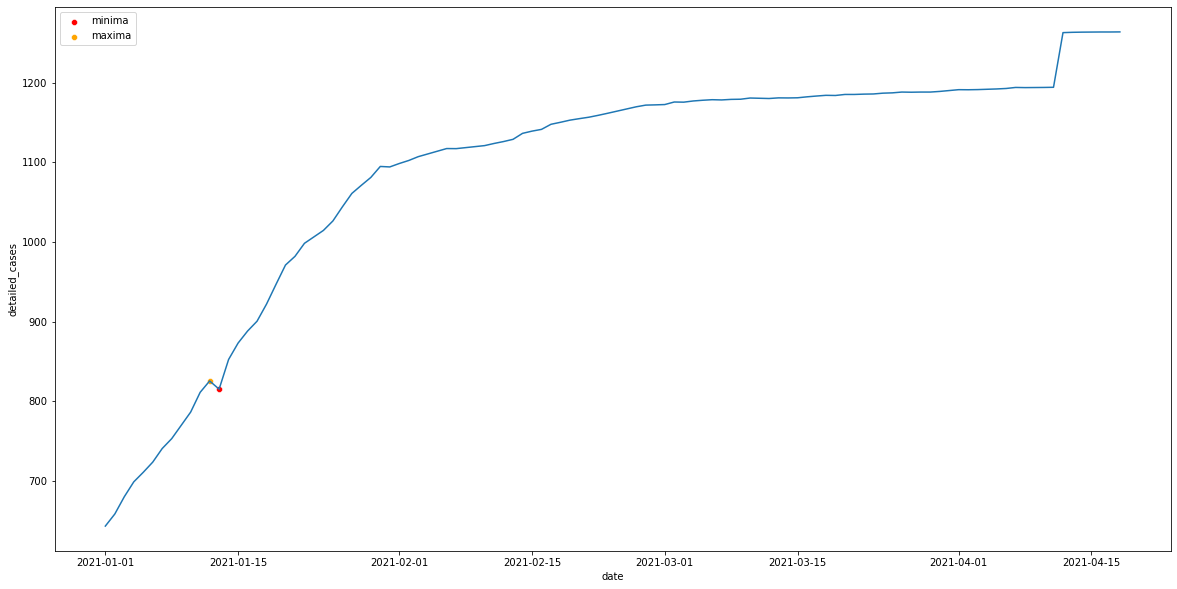

In [16]:
Eswatini_peaks_df = Eswatini_df[
    (Eswatini_df.sex == "m") &
    (Eswatini_df.age == 35)
]

prom_val = 1

down_peaks, _ = find_peaks(-Eswatini_peaks_df.detailed_cases, prominence=prom_val, plateau_size=1)
up_peaks, _ = find_peaks(Eswatini_peaks_df.detailed_cases, prominence=prom_val, plateau_size=1)

print(f"down_peaks: {down_peaks}")
print(f"up_peaks: {up_peaks}")

plt.subplots(figsize=(20,10))
sns.lineplot(x="date", y="detailed_cases", data=Eswatini_peaks_df)
sns.scatterplot(x="date", y="detailed_cases", data=Eswatini_peaks_df.iloc[down_peaks], color="red", label="minima")
sns.scatterplot(x="date", y="detailed_cases", data=Eswatini_peaks_df.iloc[up_peaks], color="orange", label="maxima")
plt.legend()
plt.show()

/Users/thomasstricker/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


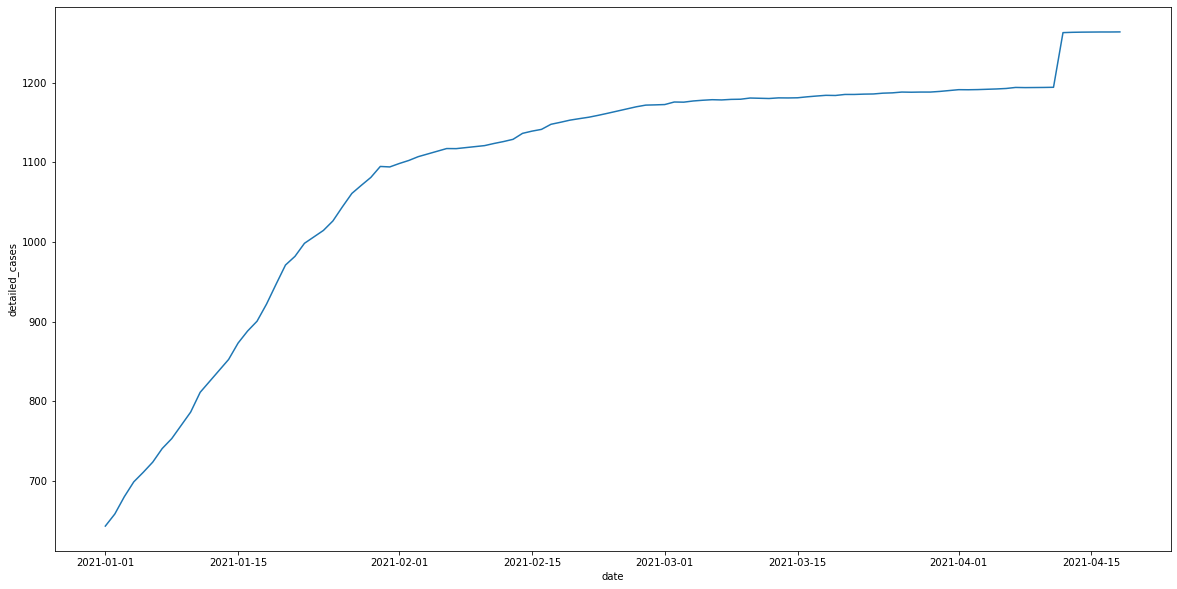

In [17]:
if down_peaks.size > 0:
    Eswatini_peaks_df.iloc[down_peaks, 7] = np.nan
    
if up_peaks.size > 0:
    Eswatini_peaks_df.iloc[up_peaks, 7] = np.nan
    
plt.subplots(figsize=(20,10))
sns.lineplot(x="date", y="detailed_cases", data=Eswatini_peaks_df)
plt.show()

down_peaks: [ 14 130]
up_peaks: [ 13 129]


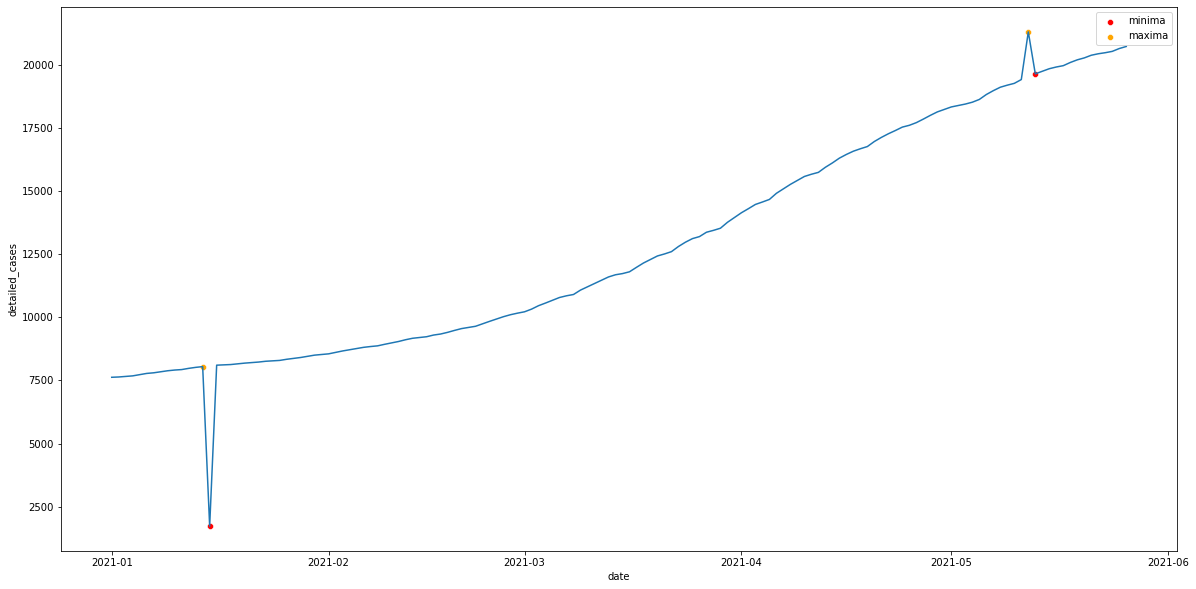

In [18]:
Greece_peaks_df = Greece_df[
    (Greece_df.sex == "f") &
    (Greece_df.age == 35)
]

prom_val = 1

down_peaks, _ = find_peaks(-Greece_peaks_df.detailed_cases, prominence=prom_val, plateau_size=1)
up_peaks, _ = find_peaks(Greece_peaks_df.detailed_cases, prominence=prom_val, plateau_size=1)

print(f"down_peaks: {down_peaks}")
print(f"up_peaks: {up_peaks}")

plt.subplots(figsize=(20,10))
sns.lineplot(x="date", y="detailed_cases", data=Greece_peaks_df)
sns.scatterplot(x="date", y="detailed_cases", data=Greece_peaks_df.iloc[down_peaks], color="red", label="minima")
sns.scatterplot(x="date", y="detailed_cases", data=Greece_peaks_df.iloc[up_peaks], color="orange", label="maxima")
plt.legend()
plt.show()

/Users/thomasstricker/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


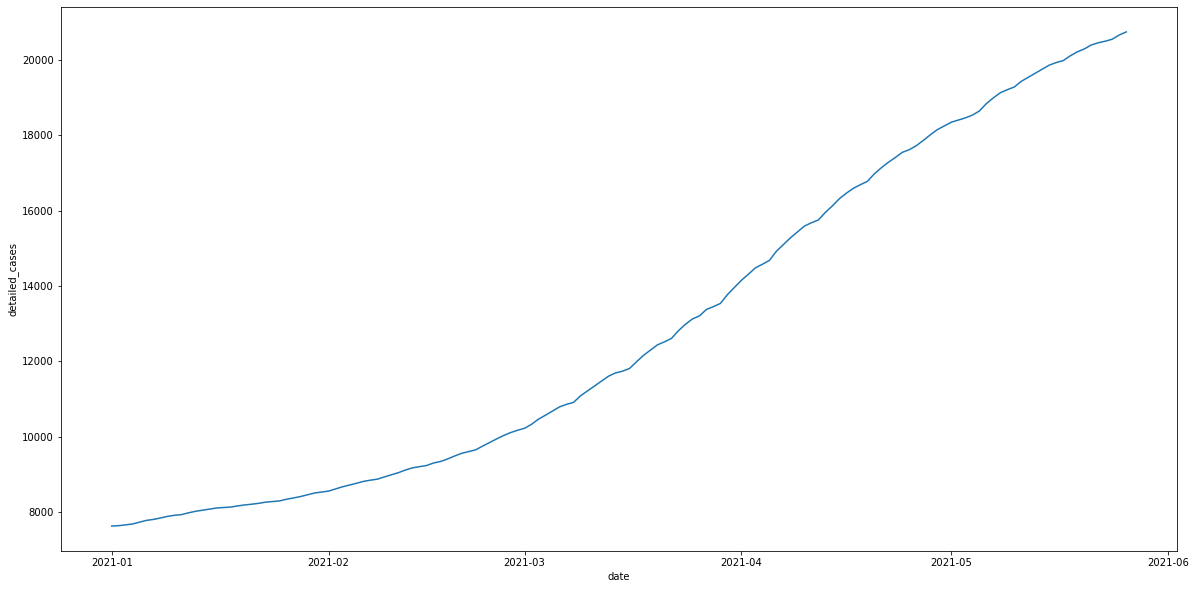

In [19]:
if down_peaks.size > 0:
    Greece_peaks_df.iloc[down_peaks, 7] = np.nan
    
if up_peaks.size > 0:
    Greece_peaks_df.iloc[up_peaks, 7] = np.nan
    
plt.subplots(figsize=(20,10))
sns.lineplot(x="date", y="detailed_cases", data=Greece_peaks_df)
plt.show()

In [20]:
def remove_peaks(data, thresh=1):
    down_peaks, _ = find_peaks(-data, prominence=thresh, plateau_size=1)
    up_peaks, _ = find_peaks(data, prominence=thresh, plateau_size=1)
    
    if down_peaks.size > 0:
        data.iloc[down_peaks, 7] = np.nan
    
    if up_peaks.size > 0:
        data.iloc[up_peaks, 7] = np.nan

In [21]:
data["detailed_new_cases"] = data.groupby(["country_name", "sex", "age"]).detailed_cases.apply()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
data["detailed_new_cases"] = data.groupby(["country_name", "sex", "age"]).detailed_cases.diff()

In [ ]:
data[
    (data.country_name == "Eswatini") &
    (data.date >= pd.to_datetime("2021-01-10")) &
    (data.date <= pd.to_datetime("2021-01-15")) &
    (data.sex == "b") &
    (data.age == 35)
].head(20)

In [ ]:
Belgium_new_df = data[(data.country_name=="Belgium")]

gridplots = sns.FacetGrid(
    Belgium_new_df,
    col='sex',
    row='country_name',
    hue='age',
    height=8,
    aspect=1,
    sharex=True,
    sharey=False
)

gridplots.map(sns.lineplot,'date', 'detailed_new_cases')
plt.legend()
plt.show()